In [15]:
#importing main modules
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns 

: 

In [16]:
#loading the dataset
df = pd.read_csv("Crop_recommendation.csv")
print(df.head())

#checking the shape of the dataset
print(df.shape)


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
(2200, 8)


In [17]:
#overview of dataset columns
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [19]:
#num of values/observations for each class
df["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [20]:
#checking for duplicate values
df.loc[df.duplicated()]

Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []

In [21]:
#checking for null values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

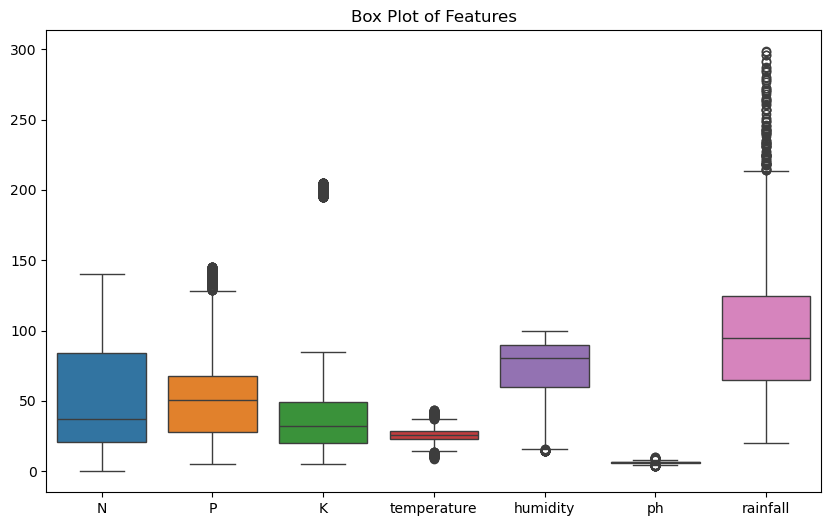

In [22]:
#checking outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Features')
plt.show()

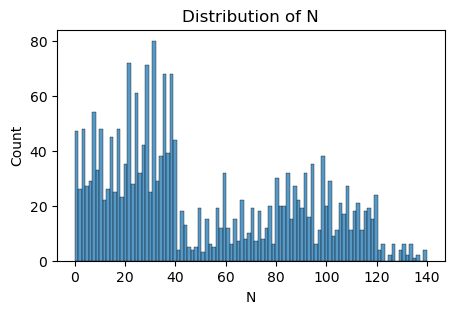

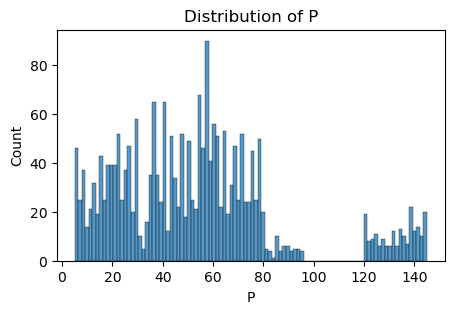

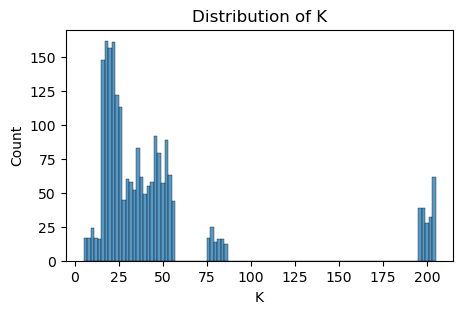

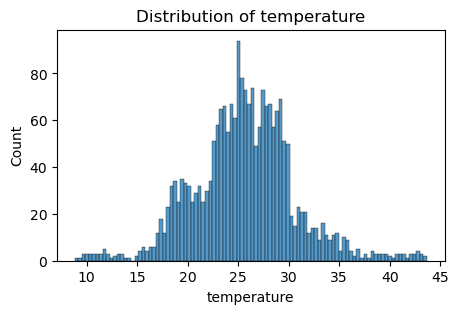

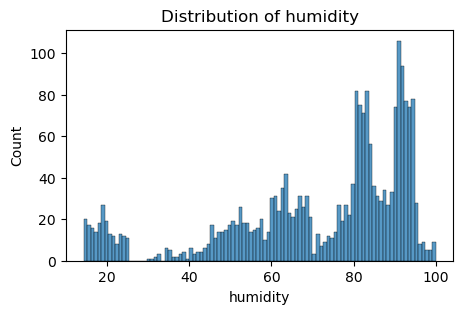

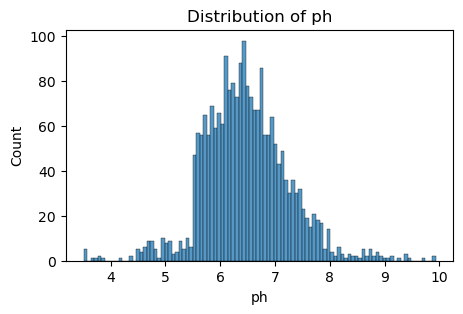

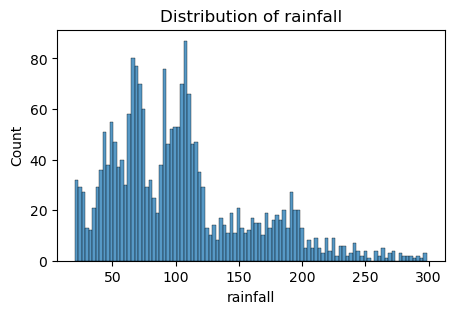

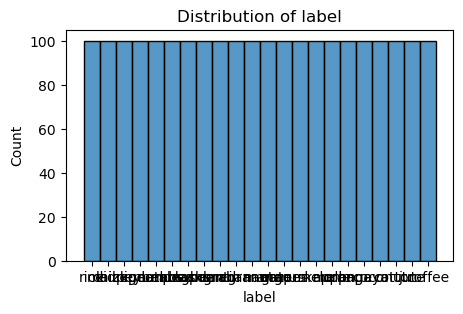

In [23]:
#checking distribution for each feature
for column in df.columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[column], bins=100)
    plt.title(f'Distribution of {column}')
    plt.show()

#Ideal transformations for features :
# N: Robust Scaler
# P: Robust Scaler
# K: Robust Scaler
# Temp, ph: Standard Scaler
# Humidity, Rainfall: Log transformation

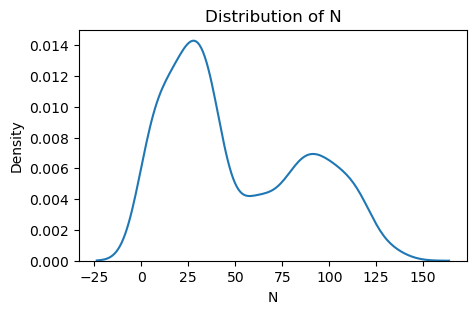

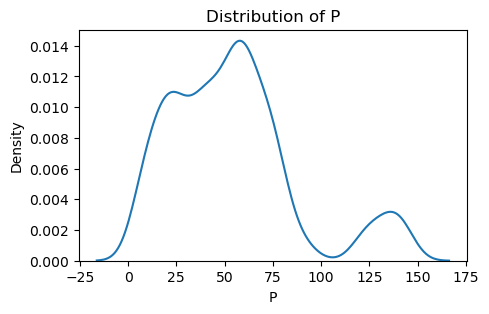

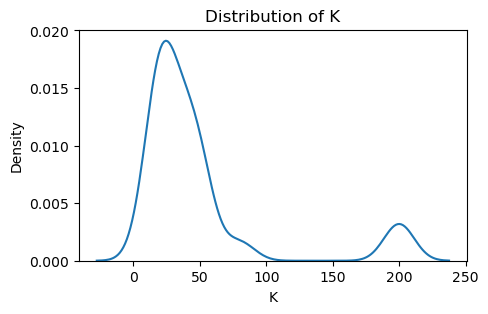

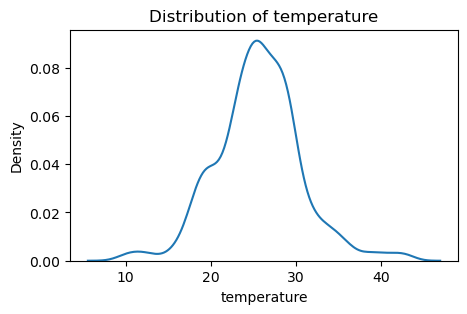

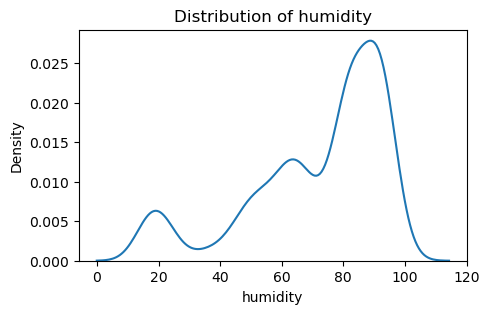

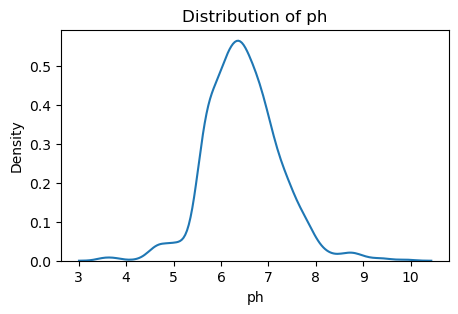

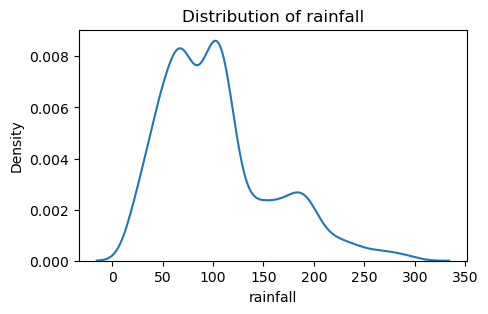

In [24]:
for column in df.columns.drop('label'):
    plt.figure(figsize=(5, 3))
    sns.kdeplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.show()

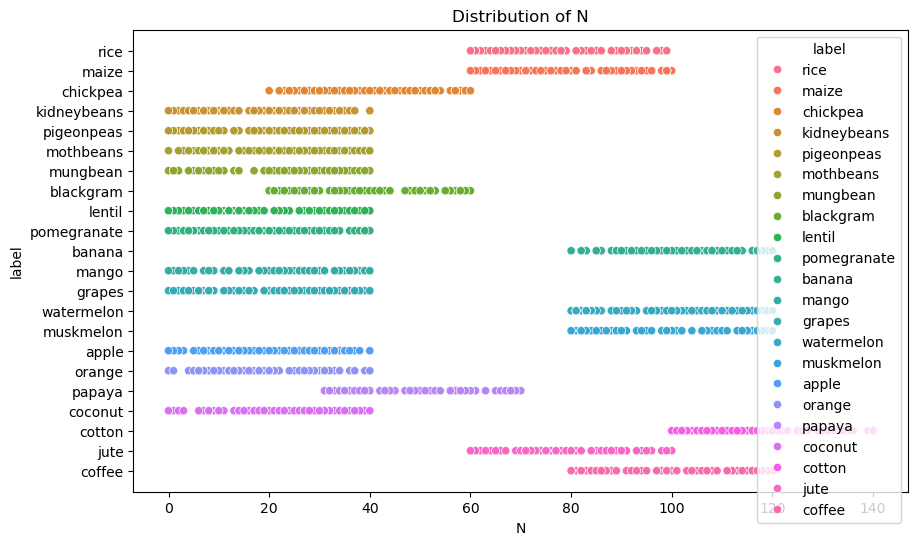

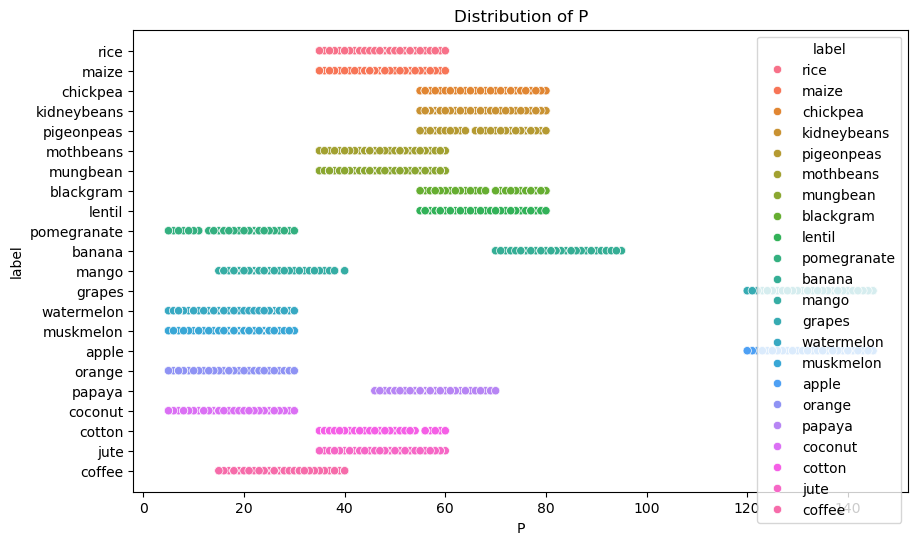

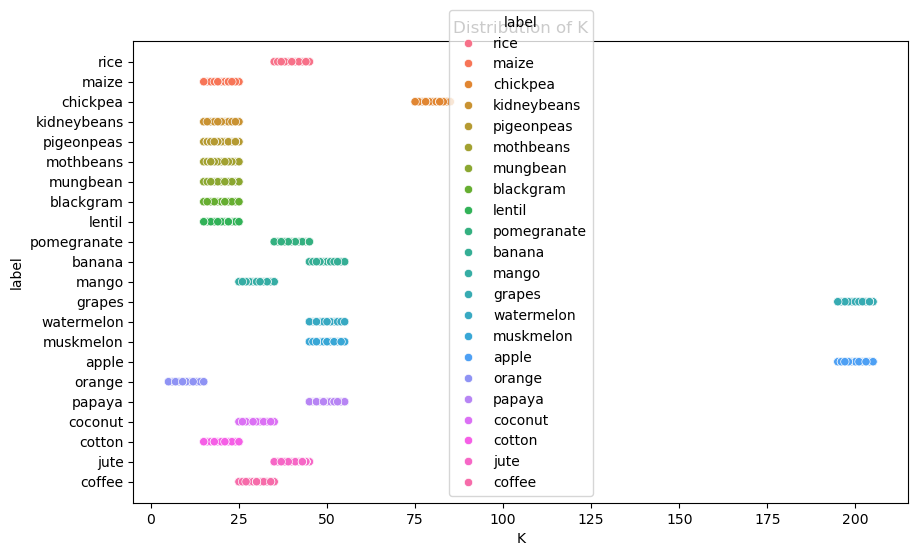

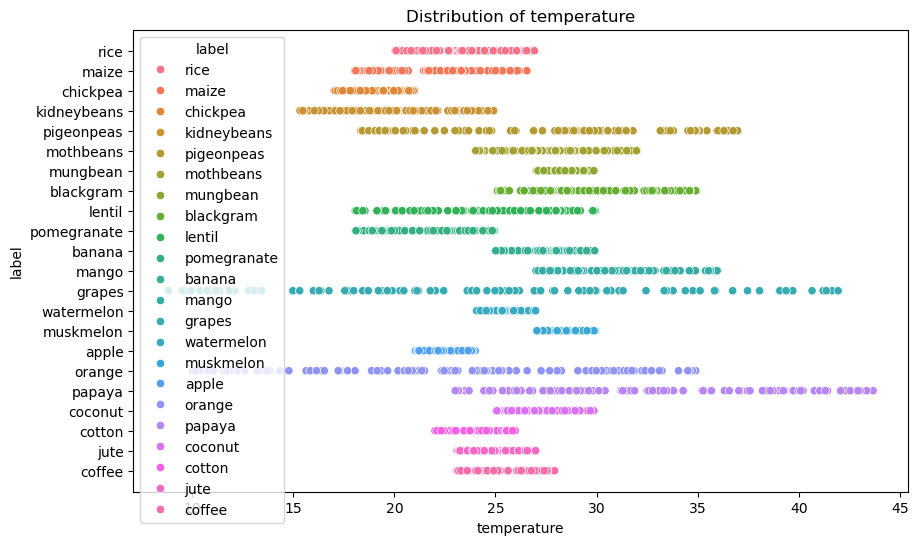

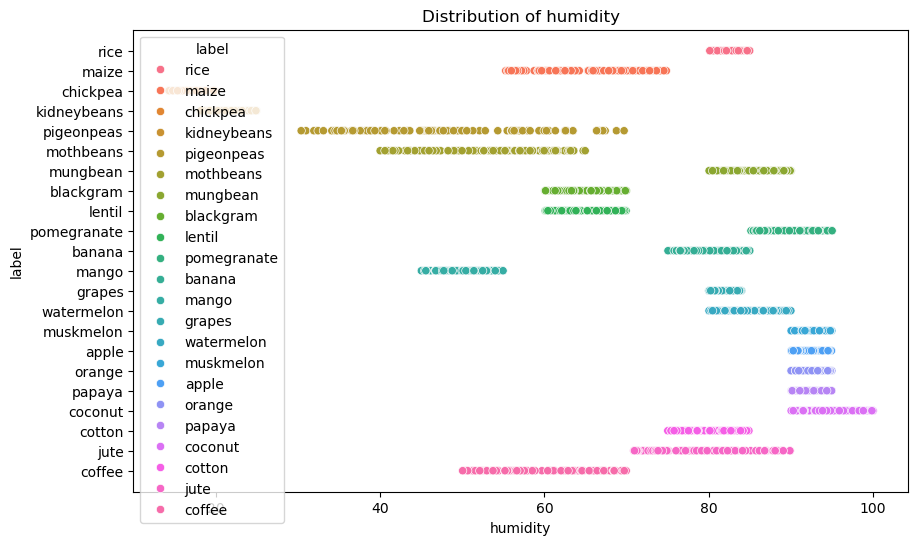

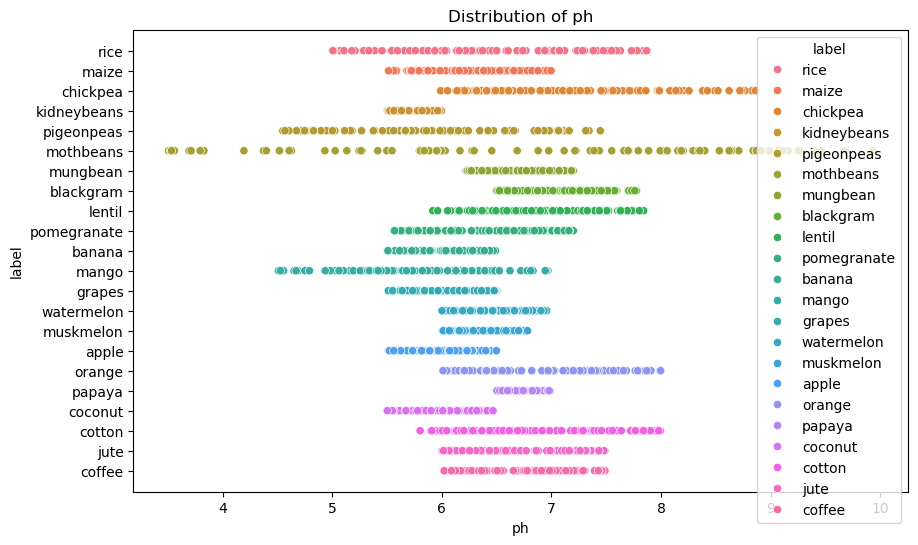

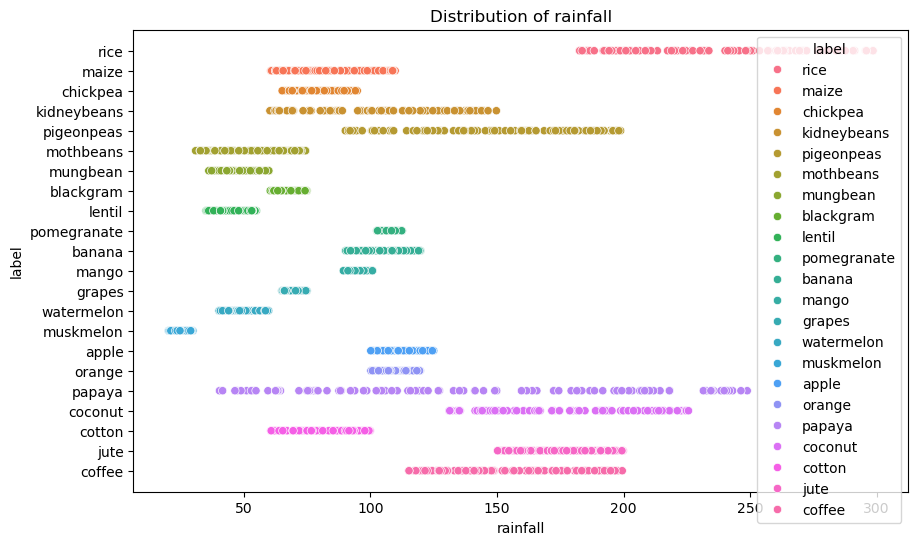

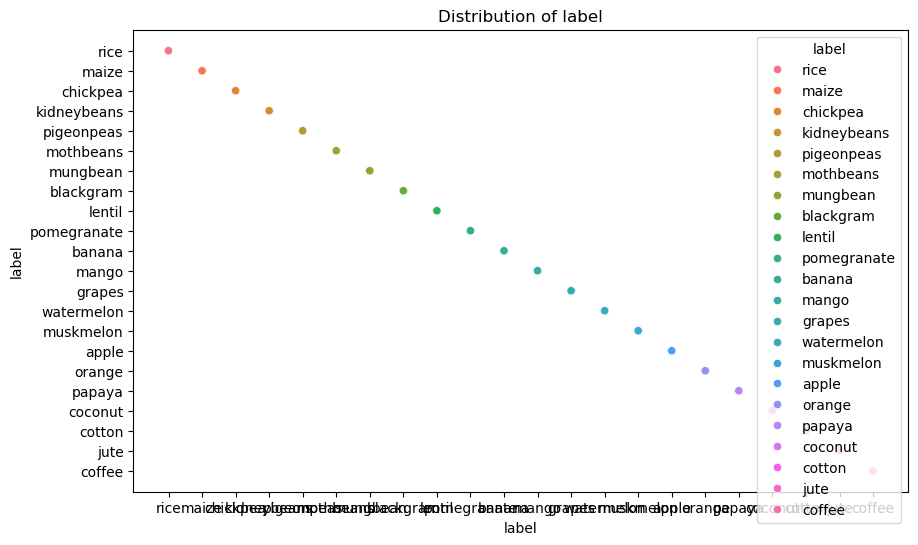

In [25]:
for column in df.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x=column, y='label', hue='label')
    plt.title(f'Distribution of {column}')
    plt.show()

<Figure size 1000x600 with 0 Axes>

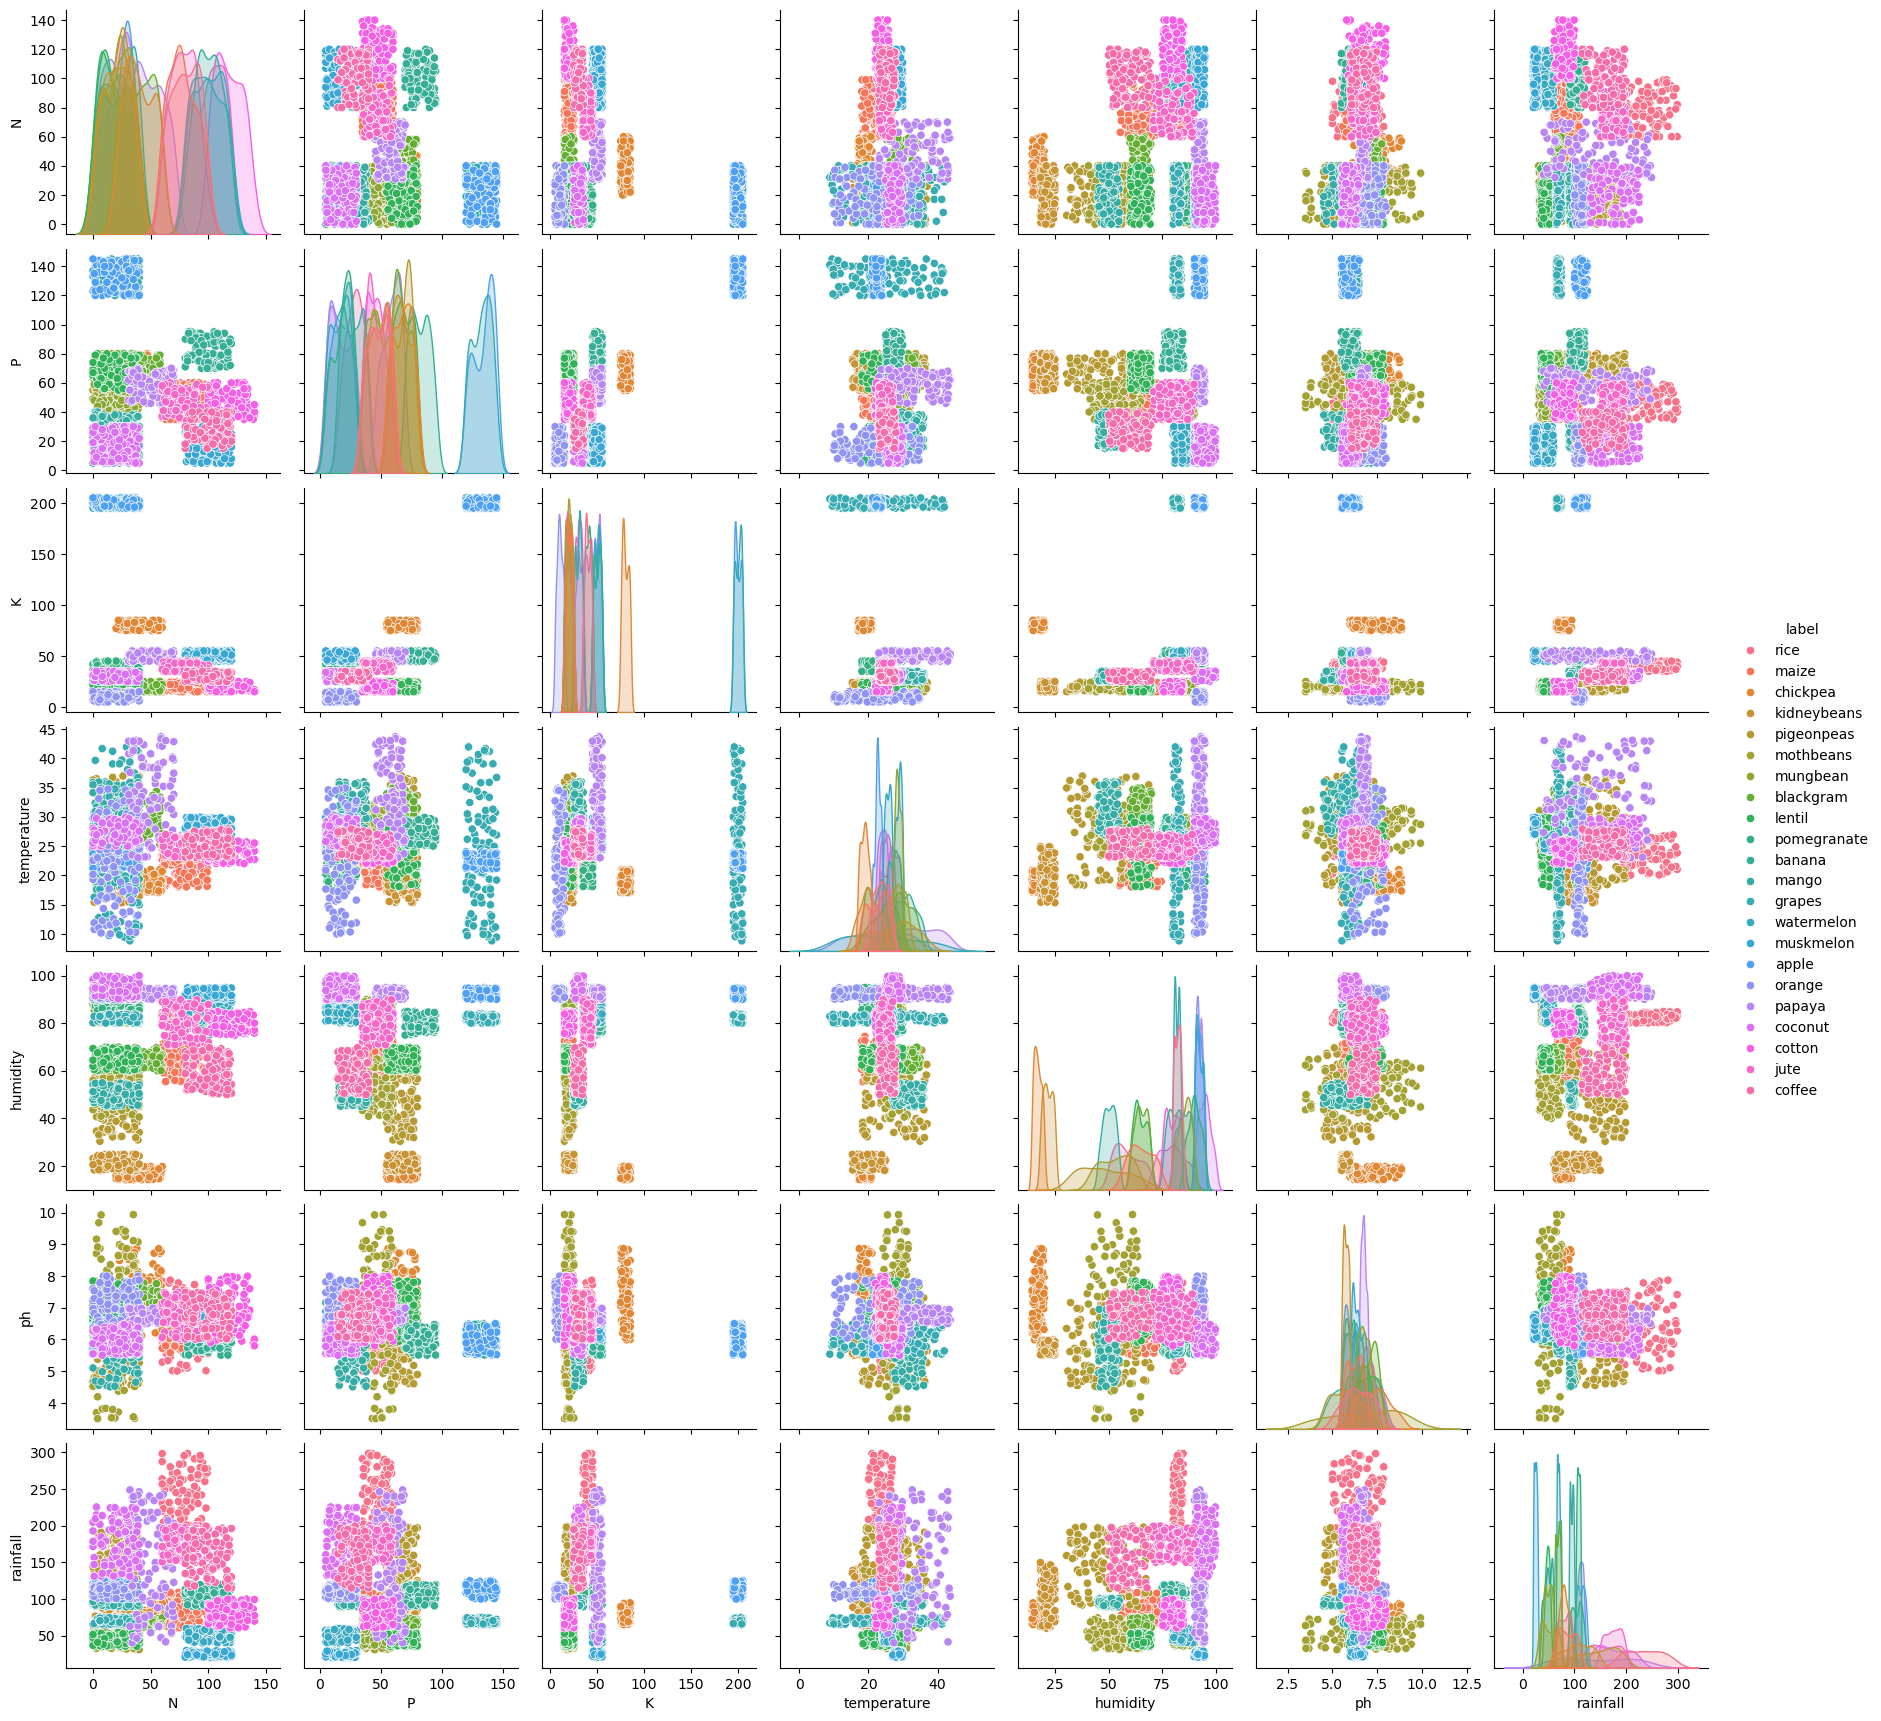

In [26]:
#checking relations for features with each other
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='label')
plt.show()


In [27]:
# #checking correlation
# df1= df.drop('label', axis=1)
# corr = df.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

ValueError: could not convert string to float: 'rice'

In [15]:
from sklearn.preprocessing import LabelEncoder


In [16]:

# le = LabelEncoder()
# df['label']= le.fit_transform(df['label']) 
# df['label'].unique()

In [17]:
#splitting the data, such that 20% from each class goes into 
from sklearn.model_selection import train_test_split

x = df.drop(columns=['label'])
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


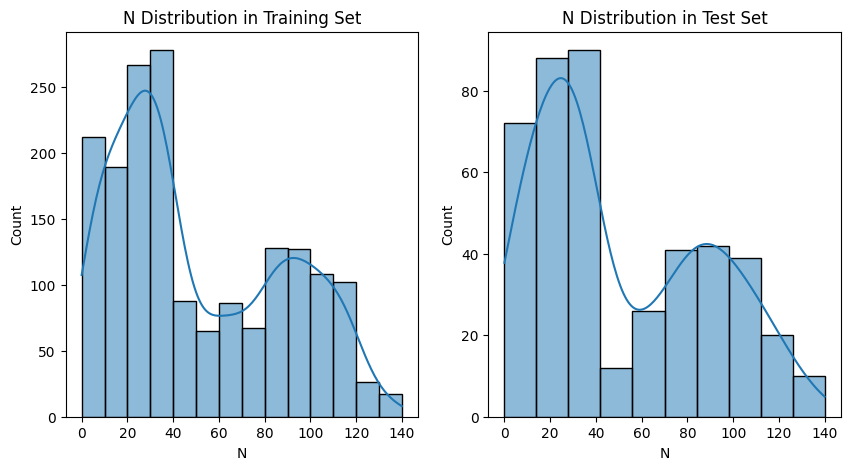

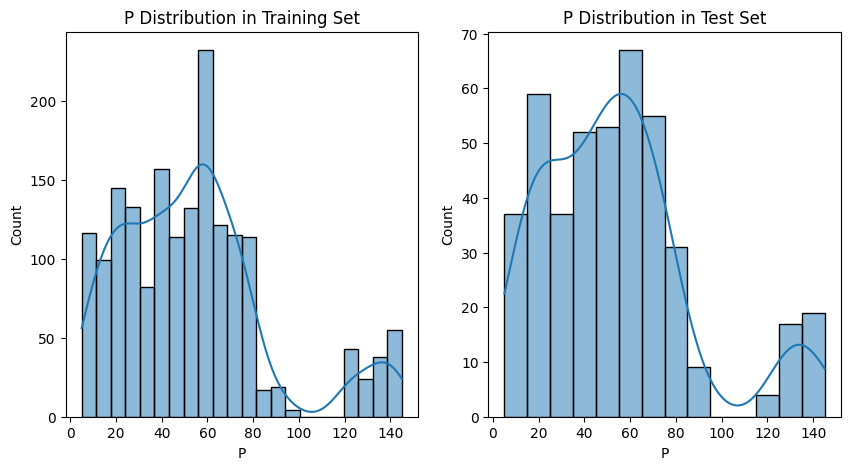

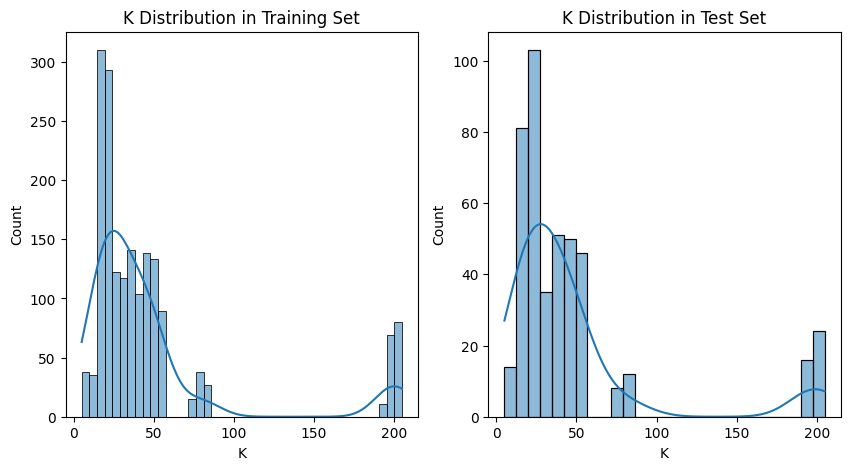

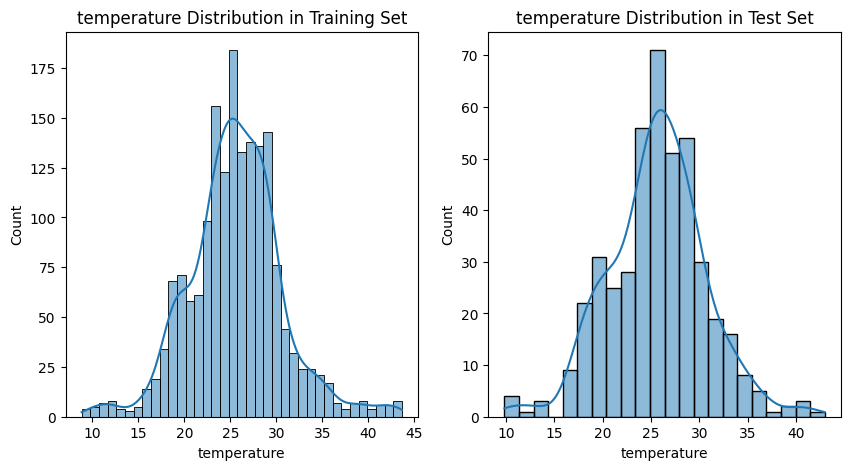

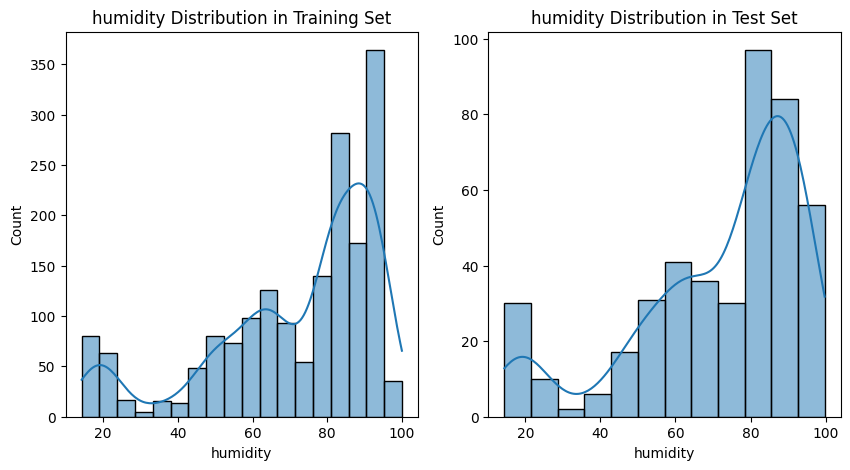

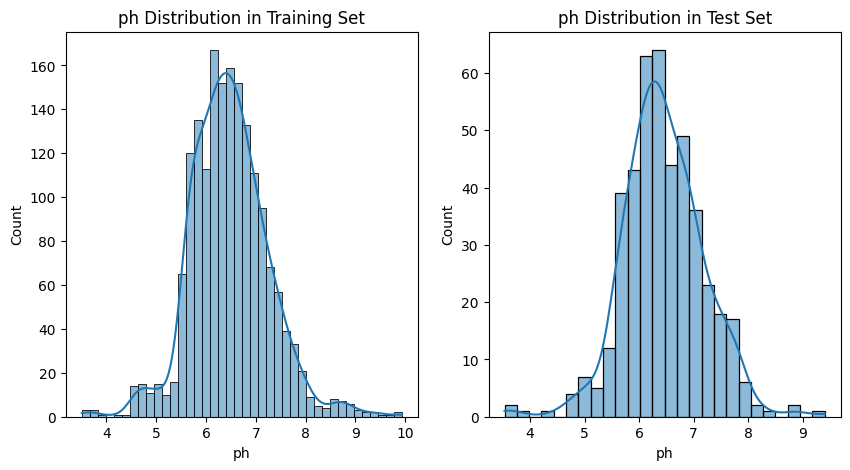

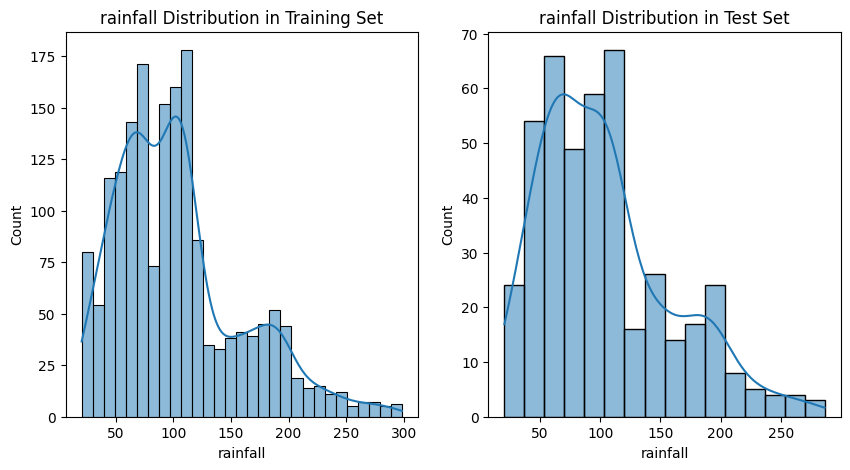

In [18]:
for col in x_train.columns:
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(x_train[col], kde=True)
    plt.title(f'{col} Distribution in Training Set')
    
    plt.subplot(1, 2, 2)
    sns.histplot(x_test[col], kde=True)
    plt.title(f'{col} Distribution in Test Set')
    
    plt.show()

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
import numpy as np


NPK_cols = ['N', 'P', 'K']
temp_ph_cols = ['temperature', 'ph']
rainfall_humidity_cols = ['rainfall', 'humidity']

# Apply RobustScaler to N, P, K
robust_scaler = RobustScaler()
x_train_NPK = robust_scaler.fit_transform(x_train[NPK_cols])
x_test_NPK = robust_scaler.transform(x_test[NPK_cols])

# t_columns = ['N', 'P', 'K']
#x_train_transformed_df_npk = pd.DataFrame(x_train_NPK, columns=t_columns)

# Create new DataFrames from the transformed arrays
x_train[NPK_cols] = pd.DataFrame(x_train_NPK, columns=NPK_cols, index=x_train.index)
x_test[NPK_cols] = pd.DataFrame(x_test_NPK, columns=NPK_cols, index=x_test.index)

# Apply StandardScaler to temperature and ph
standard_scaler_temp_ph = StandardScaler()
x_train_temp_ph = standard_scaler_temp_ph.fit_transform(x_train[temp_ph_cols])
x_test_temp_ph = standard_scaler_temp_ph.transform(x_test[temp_ph_cols])

# Create new DataFrames from the transformed arrays
x_train[temp_ph_cols] = pd.DataFrame(x_train_temp_ph, columns=temp_ph_cols, index=x_train.index)
x_test[temp_ph_cols] = pd.DataFrame(x_test_temp_ph, columns=temp_ph_cols, index=x_test.index)

# Apply log transformation to rainfall and humidity
x_train[rainfall_humidity_cols] = np.log1p(x_train[rainfall_humidity_cols])
x_test[rainfall_humidity_cols] = np.log1p(x_test[rainfall_humidity_cols])

# Combine the transformed features back into single datasets
x_train_combined = x_train[NPK_cols + temp_ph_cols + rainfall_humidity_cols]
x_test_combined = x_test[NPK_cols + temp_ph_cols + rainfall_humidity_cols]

# Apply a final StandardScaler to the combined datasets
final_scaler = StandardScaler()
x_train_transformed = final_scaler.fit_transform(x_train_combined)
x_test_transformed = final_scaler.transform(x_test_combined)



In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(x_train, y_train)

# Predict on the test data
y_pred = model.predict(x_test)



In [21]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.9954545454545455
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold , cross_val_score

# Initialize the k-NN model
knn = KNeighborsClassifier(n_neighbors=3,weights='uniform',algorithm='auto')

kf = KFold(n_splits=5 , shuffle=True,random_state=42)
cv_scores = cross_val_score(knn, x_train_transformed, y_train, cv=kf)
print(cv_scores)


# Train the model on the training data
knn.fit(x_train_transformed, y_train)


# Predict on the test data using the best k
y_pred = knn.predict(x_test_transformed)


[0.97159091 0.96022727 0.96875    0.97727273 0.96875   ]


c:\Users\nemis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\nemis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")


NameError: name 'y_test' is not defined